Importamos las librerias que vamos a utilizar

In [46]:
# Para lectura de archivos csv
import pandas as pd
# Para generar diagramas
import seaborn as sns
import plotly.express as px

# Para regresion
from sklearn import linear_model

import numpy as np
import matplotlib.pyplot as plt

#Para el clasificador
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

## **PARTE 1: ANALISIS DE DATOS**

Definimos la variable df que va a leer el archivo .csv

In [47]:
Datos = pd.read_csv('train.csv', encoding='latin1')

Mostramos las primeras 5 filas de la data

In [48]:
Datos.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost


Buscamos valores vacios

<AxesSubplot: >

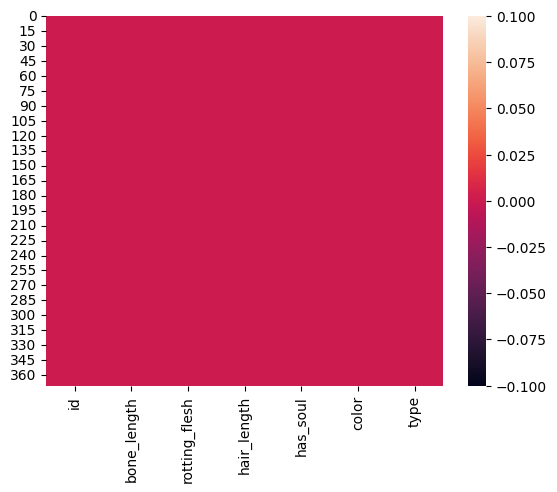

In [49]:
sns.heatmap(Datos.isna())

Vemos que no existen valores nulos

Veamos cuantos goblins, fantasmas o demonios hay

<AxesSubplot: >

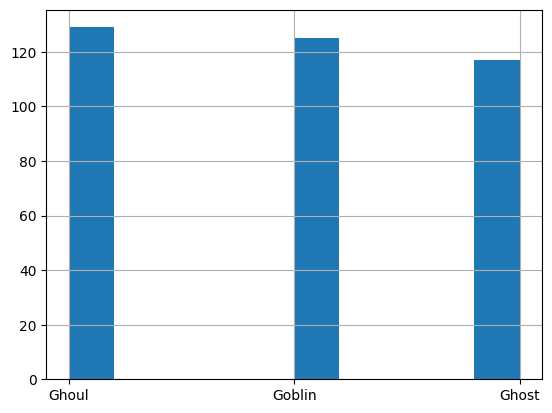

In [50]:
Datos['type'].hist()

Gráficos de dispersion:

In [51]:
# Tomando 'bone_length'
px.scatter(Datos,x='type',y='bone_length',color='type')

In [52]:
# Tomando 'rotting_flesh'
px.scatter(Datos,x='type',y='rotting_flesh',color='type')

In [53]:
# Tomando 'hair_length'
px.scatter(Datos,x='type',y='hair_length',color='type')

In [54]:
# Tomando 'has_soul'
px.scatter(Datos,x='type',y='has_soul',color='type')

In [55]:
# Tomando 'color'
px.scatter(Datos,x='type',y='color',color='type')

Tomando en cuenta los gráficos de dispersión, llegamos a la conclusión que el "color" no es un dato relevante para la clasificación. De la misma manera no hace falta tener la id

In [56]:
#Eliminamos la id y el color
Datos2 = Datos.drop(['color','id'],axis=1)

Verificamos que no exista la id ni el color en datos2

In [57]:
Datos2.head()

,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.354512,0.350839,0.465761,0.781142,Ghoul
1,0.575560,0.425868,0.531401,0.439899,Goblin
2,0.467875,0.354330,0.811616,0.791225,Ghoul
3,0.776652,0.508723,0.636766,0.884464,Ghoul
4,0.566117,0.875862,0.418594,0.636438,Ghost


## **PARTE 2: REGRESIÓN**

Para poder hacer la regresión lineal debemos pasar los datos a float, por ello haremos la siguiente conversión.

In [58]:
type_mapping = {"Ghoul":3, "Goblin":2, "Ghost":1}
Datos2['type'] = Datos2['type'].map(type_mapping)
Datos2['type'] = Datos2['type'].fillna(0)

Comprobamos que se haya hecho el cambio

In [59]:
Datos2.head()

,bone_length,rotting_flesh,hair_length,has_soul,type
0,0.354512,0.350839,0.465761,0.781142,3
1,0.575560,0.425868,0.531401,0.439899,2
2,0.467875,0.354330,0.811616,0.791225,3
3,0.776652,0.508723,0.636766,0.884464,3
4,0.566117,0.875862,0.418594,0.636438,1


Obtenemos los datos de entrenamiento y pruebas

In [60]:
X_train = Datos2.drop(['type'],axis=1)
Y_train = Datos2['type']

X_train.shape, Y_train.shape

((371, 4), (371,))

Convertimos los datos a Array que podamos leer para la regresión lineal

In [61]:
X_train_list= X_train.to_numpy()
Y_train_list= Y_train.to_numpy()

In [62]:
# Nos fijamos en una característica: en este caso "bone_length"
X_train_1 = X_train_list[:,np.newaxis,0] 

In [63]:
len(X_train_1)

371

Dividimos en conjunto de entrenamiento y pruebas

In [64]:
# Divide en conjunto de entrenamiento y prueba
train_x= X_train_1[:225]
test_x= X_train_1[225:]

# Tambien para las clases
train_y= Y_train_list[:225]
test_y= Y_train_list[225:]

In [65]:
# Corroboramos que se dividio correctamente
print(len(train_x),len(test_x))

225 146


## Creación del modelo lineal: 1

In [66]:
# Crea el modelador
regr = linear_model.LinearRegression()

In [67]:
# Entrena el modelo
regr.fit(train_x,train_y)

LinearRegression()

In [68]:
# Estima para los de prueba
y_estimada = regr.predict(test_x)

In [69]:
# Valor estimado vs valor real
print(y_estimada[100],test_y[100])

2.385394871681168 3


Mostramos el diagrama de regresión

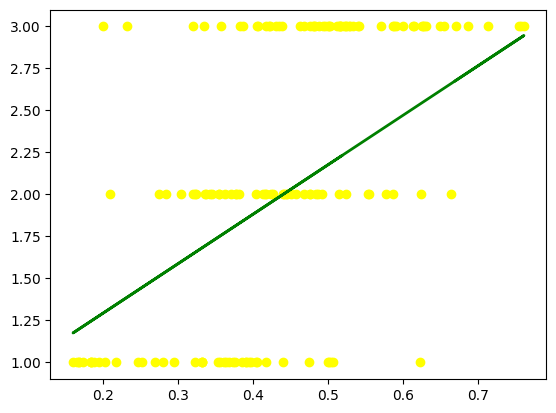

In [70]:
plt.scatter(test_x, test_y, color='yellow')
plt.plot(test_x,y_estimada, color='green', linewidth=2)

plt.show()

## Creación del modelo líneal: 2

In [71]:
# Nos fijamos en una característica: en este caso "has_soul"
X_train_2 = X_train_list[:,np.newaxis,3] 

In [72]:
# Checamos longitud del conjunto
len(X_train_2)

371

In [73]:
# Divide en conjunto de entrenamiento y prueba
train_x_2= X_train_2[:225]
test_x_2= X_train_2[225:]

# Tambien para las clases
train_y_2= Y_train_list[:225]
test_y_2= Y_train_list[225:]

In [74]:
# Corroboramos que se dividio correctamente
print(len(train_x_2),len(test_x_2))

225 146


In [75]:
# Crea el modelador
regr2 = linear_model.LinearRegression()

In [76]:
# Entrena el modelo
regr2.fit(train_x_2,train_y_2)

LinearRegression()

In [77]:
# Estima para los de prueba
y_estimada_2 = regr.predict(test_x_2)

In [78]:
# Valor estimado vs valor real
print(y_estimada_2[100],test_y_2[100])

3.0169982751179147 3


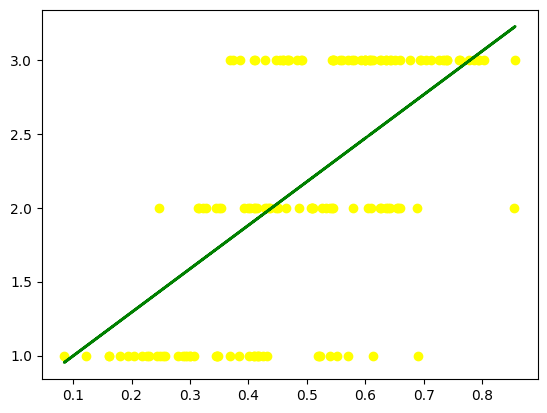

In [79]:
plt.scatter(test_x_2, test_y_2, color='yellow')
plt.plot(test_x_2,y_estimada_2, color='green', linewidth=2)

plt.show()

## **PARTE 3: CLASIFICADOR**

In [80]:
# Creamos el clasificador y lo ajustamos
# Usando el clasificador de arbol de decisión

clasificador = DecisionTreeClassifier()

clasificador.fit(X_train_list, Y_train_list)

DecisionTreeClassifier()

## Estima para la prueba y mide que tan buena fue

In [81]:
y_predecida = clasificador.predict(X_train_list)

# Precision del modelo de clasificación
print("Precision:", metrics.accuracy_score(Y_train_list, y_predecida))

Precision: 1.0


Imprimimos los resultados del clasificador

In [82]:
print(y_predecida)

[3 2 3 3 1 2 2 3 1 1 2 3 3 2 2 3 1 3 3 1 2 3 2 3 3 1 2 2 2 2 3 1 2 2 3 1 1
 3 3 1 3 1 1 2 3 2 3 1 2 2 3 3 1 2 1 2 1 2 1 3 2 2 3 2 3 1 1 3 1 3 3 1 1 3
 3 2 2 1 3 3 1 1 1 2 1 2 3 2 3 3 1 3 2 3 2 2 1 2 2 1 1 1 1 2 2 1 3 2 2 3 1
 2 3 1 2 1 1 2 1 3 2 2 1 2 3 1 1 2 3 3 3 3 3 2 2 3 2 2 2 3 2 2 1 2 3 1 1 2
 2 2 1 1 1 3 1 3 2 2 1 1 1 2 2 3 2 2 3 2 1 1 2 1 2 1 1 1 3 1 2 3 1 1 3 1 2
 2 1 1 1 3 3 2 3 1 2 3 3 2 1 1 3 3 3 2 1 1 3 2 2 2 2 3 2 1 2 3 3 1 1 3 1 2
 2 3 2 3 3 2 1 3 3 2 3 3 2 2 2 3 3 2 3 3 1 1 1 1 1 1 3 3 2 1 3 2 1 1 3 1 3
 2 1 1 2 1 2 2 1 1 2 2 2 1 1 3 3 2 1 1 2 3 2 3 3 1 3 1 2 3 3 3 1 3 3 1 3 3
 2 1 2 1 1 2 1 3 3 3 3 3 3 2 3 2 3 2 2 2 3 2 3 3 2 1 1 2 3 3 3 3 1 3 3 1 2
 1 2 1 1 3 3 3 2 2 3 2 1 3 2 1 2 3 1 2 3 2 1 2 2 3 1 3 3 3 2 1 2 3 2 1 3 1
 3]


Imprimimos los datos reales

In [83]:
print(Y_train_list)

[3 2 3 3 1 2 2 3 1 1 2 3 3 2 2 3 1 3 3 1 2 3 2 3 3 1 2 2 2 2 3 1 2 2 3 1 1
 3 3 1 3 1 1 2 3 2 3 1 2 2 3 3 1 2 1 2 1 2 1 3 2 2 3 2 3 1 1 3 1 3 3 1 1 3
 3 2 2 1 3 3 1 1 1 2 1 2 3 2 3 3 1 3 2 3 2 2 1 2 2 1 1 1 1 2 2 1 3 2 2 3 1
 2 3 1 2 1 1 2 1 3 2 2 1 2 3 1 1 2 3 3 3 3 3 2 2 3 2 2 2 3 2 2 1 2 3 1 1 2
 2 2 1 1 1 3 1 3 2 2 1 1 1 2 2 3 2 2 3 2 1 1 2 1 2 1 1 1 3 1 2 3 1 1 3 1 2
 2 1 1 1 3 3 2 3 1 2 3 3 2 1 1 3 3 3 2 1 1 3 2 2 2 2 3 2 1 2 3 3 1 1 3 1 2
 2 3 2 3 3 2 1 3 3 2 3 3 2 2 2 3 3 2 3 3 1 1 1 1 1 1 3 3 2 1 3 2 1 1 3 1 3
 2 1 1 2 1 2 2 1 1 2 2 2 1 1 3 3 2 1 1 2 3 2 3 3 1 3 1 2 3 3 3 1 3 3 1 3 3
 2 1 2 1 1 2 1 3 3 3 3 3 3 2 3 2 3 2 2 2 3 2 3 3 2 1 1 2 3 3 3 3 1 3 3 1 2
 1 2 1 1 3 3 3 2 2 3 2 1 3 2 1 2 3 1 2 3 2 1 2 2 3 1 3 3 3 2 1 2 3 2 1 3 1
 3]


In [84]:
metrics.confusion_matrix(Y_train_list,y_predecida)

array([[117,   0,   0],
       [  0, 125,   0],
       [  0,   0, 129]], dtype=int64)

## **EXTRA: OTRO CLASIFICADOR**

In [85]:
from sklearn.neural_network import MLPClassifier
clasificador = MLPClassifier(alpha=1, max_iter=1000) # Clasificaremos con redes neuronales

# Ajustalo
clasificador.fit(X_train_list, Y_train_list)

MLPClassifier(alpha=1, max_iter=1000)

Estima para la prueba y mide que tan buena fue

In [86]:
y_predecida2 = clasificador.predict(X_train_list)

# Precision del modelo de clasificación
print("Precision:", metrics.accuracy_score(Y_train_list, y_predecida2))

Precision: 0.7654986522911051


Imprimimos los resultados del clasificador

In [87]:
print(y_predecida2)

[3 2 3 3 1 2 2 3 1 1 1 3 3 2 3 3 2 3 3 1 2 2 2 2 3 1 3 2 2 2 2 1 3 2 3 1 2
 3 3 1 3 1 1 2 2 1 3 1 2 2 3 3 1 1 1 3 1 3 1 3 2 1 3 1 3 1 1 3 1 2 2 1 1 3
 3 2 2 1 3 3 1 1 1 3 1 2 3 1 3 3 1 3 2 2 2 3 1 2 2 1 1 1 1 1 2 1 3 1 2 3 1
 2 3 1 2 1 1 2 1 3 1 2 2 3 3 1 1 1 3 3 3 3 3 3 3 3 2 1 2 3 2 2 1 3 3 2 1 2
 2 3 2 2 1 3 1 3 2 2 1 1 1 2 2 3 3 3 3 2 1 1 3 1 1 1 1 1 3 1 2 3 1 1 3 1 3
 3 1 1 1 3 2 2 3 1 2 1 3 1 1 1 3 3 2 2 1 1 3 3 2 2 2 3 2 1 3 3 3 1 1 3 1 3
 2 2 2 3 3 3 1 3 3 1 3 3 2 2 2 3 3 2 3 2 1 1 1 1 1 1 2 3 3 1 2 3 1 2 3 1 3
 2 1 1 2 2 2 1 1 2 2 2 3 1 1 2 3 1 1 1 3 3 2 3 2 1 3 1 3 3 2 3 1 2 2 1 3 3
 2 2 2 1 1 3 1 3 3 3 3 3 2 2 3 2 3 2 2 3 3 2 2 3 2 1 1 2 3 3 3 3 1 3 3 1 3
 2 2 2 1 1 3 3 2 2 3 3 1 3 2 1 2 3 2 2 3 1 1 2 2 3 1 3 2 3 2 1 3 3 3 2 2 1
 3]


Imprimimos los datos reales

In [88]:
print(Y_train_list)

[3 2 3 3 1 2 2 3 1 1 2 3 3 2 2 3 1 3 3 1 2 3 2 3 3 1 2 2 2 2 3 1 2 2 3 1 1
 3 3 1 3 1 1 2 3 2 3 1 2 2 3 3 1 2 1 2 1 2 1 3 2 2 3 2 3 1 1 3 1 3 3 1 1 3
 3 2 2 1 3 3 1 1 1 2 1 2 3 2 3 3 1 3 2 3 2 2 1 2 2 1 1 1 1 2 2 1 3 2 2 3 1
 2 3 1 2 1 1 2 1 3 2 2 1 2 3 1 1 2 3 3 3 3 3 2 2 3 2 2 2 3 2 2 1 2 3 1 1 2
 2 2 1 1 1 3 1 3 2 2 1 1 1 2 2 3 2 2 3 2 1 1 2 1 2 1 1 1 3 1 2 3 1 1 3 1 2
 2 1 1 1 3 3 2 3 1 2 3 3 2 1 1 3 3 3 2 1 1 3 2 2 2 2 3 2 1 2 3 3 1 1 3 1 2
 2 3 2 3 3 2 1 3 3 2 3 3 2 2 2 3 3 2 3 3 1 1 1 1 1 1 3 3 2 1 3 2 1 1 3 1 3
 2 1 1 2 1 2 2 1 1 2 2 2 1 1 3 3 2 1 1 2 3 2 3 3 1 3 1 2 3 3 3 1 3 3 1 3 3
 2 1 2 1 1 2 1 3 3 3 3 3 3 2 3 2 3 2 2 2 3 2 3 3 2 1 1 2 3 3 3 3 1 3 3 1 2
 1 2 1 1 3 3 3 2 2 3 2 1 3 2 1 2 3 1 2 3 2 1 2 2 3 1 3 3 3 2 1 2 3 2 1 3 1
 3]


In [89]:
metrics.confusion_matrix(Y_train_list,y_predecida2)

array([[103,  14,   0],
       [ 17,  76,  32],
       [  2,  22, 105]], dtype=int64)

## **CONCLUSIONES FINALES**

Con este análisis de datos pudimos descubrir que existen más Ghouls que Goblins, y a su vez más Gobblins que Ghosts, y también que en este mismo orden los Goblins tienen huesos más largos que los Ghosts, por lo que intuímos que esto afecta directamente en la estatura. Otra similitud es que, también en el mismo orden, existen más poblaciones de Ghouls que de Goblins, y a su vez, de Goblins que de Ghosts. Lo mismo pasa con 'hair-length'

Siguiendo con el análisis de datos, si consideramos la propiedad 'rotting_flesh', notaremos que, en el tipo de mounstro que esto está más presente es en los Ghosts, pasando a segundo grado los Goblinsm y por último los Ghouls.

En el caso de las clasificaciones, el modelo de arból de decisión vemos que actua de manera efectiva en comparación del MLP, ya que, la manera en que clasifica los datos se acerca muchísimo con los monstruos a las espectativas  tal y como debería ser con los datos reales. Esto no sucede en el clasificador MLP.
Por ello, podemos concluir que este es un buen modelo para abordar este problema.